**Objective:**

Demonstrate various dimensionality reduction techniques

**Dataset:** 

sign-language-mnist

The Sign Language MNIST dataset is an American Sign Language letter dataset of hand gestures. It has 24 classes of letters and can be categorized as a multi-class problem.

**Dimensionality Reduction Techniques:**

i) PCA

ii) SVD

iii) LLE

iv) t-SNE

v) ISOMAP

vi) UMAP

In [1]:
! pip install umap-learn

     |████████████████████████████████| 86 kB 3.3 MB/s 
     |████████████████████████████████| 1.1 MB 18.8 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=5ff2b4046623534bd607534c8896edf077e6a17edb22f270fde60af34e1f76ec
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=cc2d8447f11423f78f0f871de733019cbb81bf8e7d9ee7eb8144cd3ec476942b
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent


In [2]:
! pip install ipython-autotime

In [3]:
# load time of execution for each block
%load_ext autotime

time: 110 µs (started: 2021-11-10 05:46:03 +00:00)


In [4]:
import os
import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from numpy import linalg as LA
from scipy import optimize

import umap.umap_ as umap
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import Isomap

from matplotlib import pyplot as plt
import imageio
import tqdm

time: 22.9 s (started: 2021-11-10 05:46:04 +00:00)


In [5]:
! pip install kaggle

time: 3.15 s (started: 2021-11-10 05:46:29 +00:00)


In [6]:
! mkdir ~/.kaggle

time: 127 ms (started: 2021-11-10 05:46:35 +00:00)


In [7]:
! cp kaggle.json ~/.kaggle/

time: 126 ms (started: 2021-11-10 05:46:41 +00:00)


In [8]:
! chmod 600 ~/.kaggle/kaggle.json

time: 123 ms (started: 2021-11-10 05:46:43 +00:00)


In [9]:
! kaggle datasets download -d datamunge/sign-language-mnist

 80% 50.0M/62.6M [00:00<00:00, 75.1MB/s]
100% 62.6M/62.6M [00:00<00:00, 98.6MB/s]
time: 1.43 s (started: 2021-11-10 05:46:45 +00:00)


In [10]:
! unzip sign-language-mnist.zip

Archive:  sign-language-mnist.zip
  inflating: amer_sign2.png          
  inflating: amer_sign3.png          
  inflating: american_sign_language.PNG  
  inflating: sign_mnist_test.csv     
  inflating: sign_mnist_test/sign_mnist_test.csv  
  inflating: sign_mnist_train.csv    
  inflating: sign_mnist_train/sign_mnist_train.csv  
time: 2.27 s (started: 2021-11-10 05:46:48 +00:00)


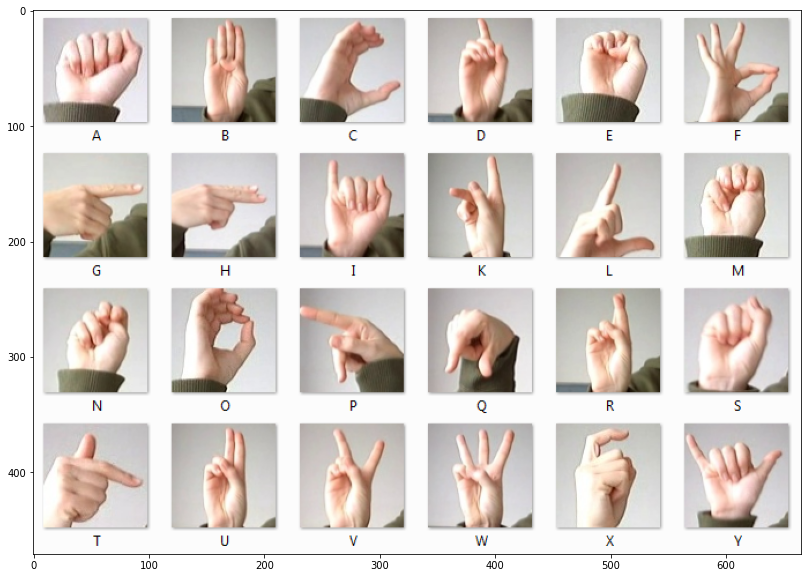

time: 613 ms (started: 2021-11-10 05:46:55 +00:00)


In [11]:
fig = plt.figure(figsize=(20,10))
image = imageio.imread("amer_sign2.png")
plt.imshow(image)

In [12]:
df = pd.read_csv("sign_mnist_train.csv")
df.head()
df.shape

(27455, 785)

time: 3.2 s (started: 2021-11-10 05:47:02 +00:00)


In [13]:
letter2encode = {'A': 0,'B': 1,'C': 2,'D': 3,'E': 4,'F': 5,'G': 6,'H': 7,'I': 8,'K': 9,'L': 10,'M': 11,
                'N': 12,'O': 13,'P': 14,'Q': 15,'R': 16,'S': 17,'T': 18,'U': 19,'V': 20,'W': 21,'X': 22, 'Y': 23}

def fix_label_gap(l):
    if(l>=9):
        return (l-1)
    else:
        return l

def encode(character):
    return letter2encode[character]

df['label'] = df['label'].apply(fix_label_gap)

time: 24.2 ms (started: 2021-11-10 05:47:06 +00:00)


[18, 7, 0, 12, 9, 17]


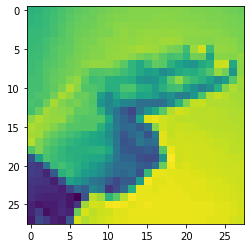

time: 284 ms (started: 2021-11-10 05:47:14 +00:00)


In [14]:
WORD = 'THANKS'

word = np.array(list(WORD))
embedded_word = list(map(encode, word))
print(embedded_word)

reduced_df = df[df['label'].isin(embedded_word)]

reduced_df.shape
X = reduced_df.loc[:, reduced_df.columns != 'label'].values

len(X)
y = reduced_df['label'].values

plt.imshow(X[12].reshape(28,28))

In [15]:
X_PCA = PCA(n_components=5).fit_transform(X)

time: 828 ms (started: 2021-11-10 05:48:54 +00:00)


In [16]:
X_SVD = TruncatedSVD(n_components = 5).fit_transform(X)

time: 951 ms (started: 2021-11-10 05:48:55 +00:00)


In [17]:
X_TSNE = TSNE().fit_transform(X)

time: 2min (started: 2021-11-10 05:48:57 +00:00)


In [18]:
X_UMAP = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='correlation').fit_transform(X)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


time: 42.4 s (started: 2021-11-10 05:51:34 +00:00)


In [19]:
X_LLE = LocallyLinearEmbedding(n_components=20).fit_transform(X)

time: 1min 23s (started: 2021-11-10 05:52:36 +00:00)


In [20]:
X_ISO = Isomap(n_components=20).fit_transform(X)

time: 1min 22s (started: 2021-11-10 05:54:04 +00:00)


**PCA Visualization**

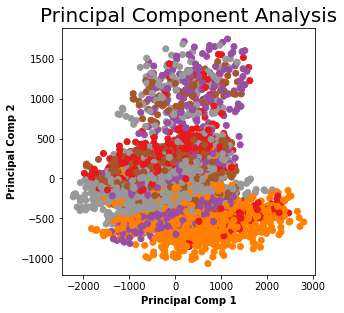

time: 334 ms (started: 2021-11-10 05:55:36 +00:00)


In [21]:
fig = plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.scatter(X_PCA[:,0], X_PCA[:,1], c=y, cmap='Set1')
plt.title("Principal Component Analysis", fontsize=20)
plt.xlabel('Principal Comp 1', weight='bold').set_fontsize('10')
plt.ylabel('Principal Comp 2', weight='bold').set_fontsize('10')
plt.show()

**UMAP Visualization**

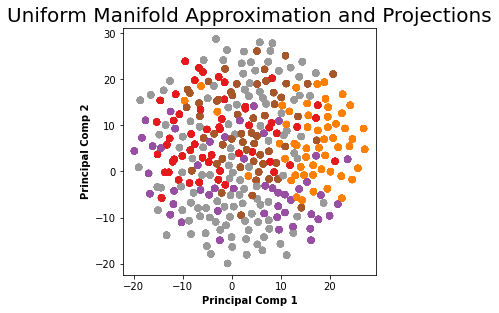

time: 520 ms (started: 2021-11-10 05:56:19 +00:00)


In [22]:
fig = plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.scatter(X_UMAP[:,0], X_UMAP[:,1], c=y, cmap='Set1')
plt.title("Uniform Manifold Approximation and Projections", fontsize=20)
plt.xlabel('Principal Comp 1', weight='bold').set_fontsize('10')
plt.ylabel('Principal Comp 2', weight='bold').set_fontsize('10')

**SVD Visualization**

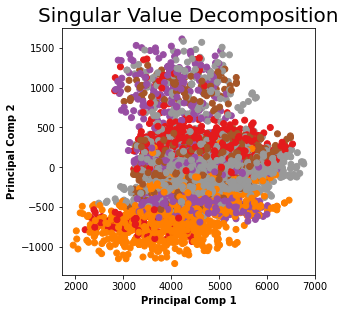

time: 362 ms (started: 2021-11-10 05:56:26 +00:00)


In [23]:
fig = plt.figure(figsize=(10,10))
plt.subplot(2,2,2)
plt.scatter(X_SVD[:,0], X_SVD[:,1], c=y, cmap='Set1')
plt.title("Singular Value Decomposition", fontsize=20)
plt.xlabel('Principal Comp 1', weight='bold').set_fontsize('10')
plt.ylabel('Principal Comp 2', weight='bold').set_fontsize('10')
plt.show()

**TSNE Visualization**

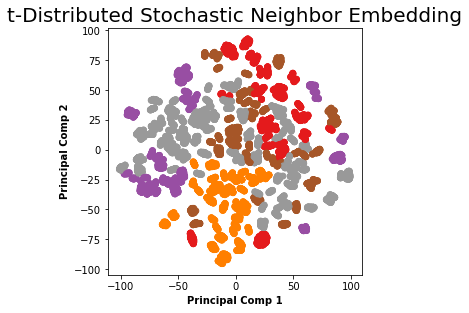

time: 389 ms (started: 2021-11-10 05:56:34 +00:00)


In [24]:
fig = plt.figure(figsize=(10,10))
plt.subplot(2,2,4)
plt.scatter(X_TSNE[:,0], X_TSNE[:,1], c=y, cmap='Set1')
plt.title("t-Distributed Stochastic Neighbor Embedding", fontsize=20)
plt.xlabel('Principal Comp 1', weight='bold').set_fontsize('10')
plt.ylabel('Principal Comp 2', weight='bold').set_fontsize('10')
plt.show()

**LLE Visualization**

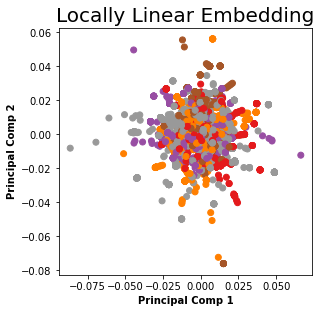

time: 733 ms (started: 2021-11-10 05:56:41 +00:00)


In [25]:
fig = plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.scatter(X_LLE[:,0], X_LLE[:,1], c=y, cmap='Set1')
plt.title("Locally Linear Embedding", fontsize=20)
plt.xlabel('Principal Comp 1', weight='bold').set_fontsize('10')
plt.ylabel('Principal Comp 2', weight='bold').set_fontsize('10')
plt.show()

**ISOMAP Visualization**

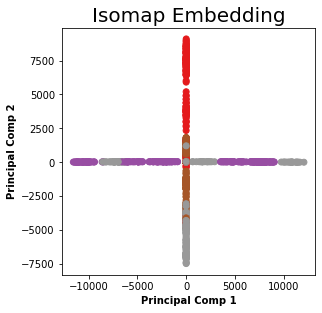

time: 344 ms (started: 2021-11-10 05:56:54 +00:00)


In [26]:
fig = plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.scatter(X_ISO[:,0], X_ISO[:,1], c=y, cmap='Set1')
plt.title("Isomap Embedding", fontsize=20)
plt.xlabel('Principal Comp 1', weight='bold').set_fontsize('10')
plt.ylabel('Principal Comp 2', weight='bold').set_fontsize('10')
plt.show()

**Model prediction before dimensionality reduction**

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

time: 14.1 ms (started: 2021-11-10 05:57:10 +00:00)


In [28]:
#X_flat = np.array(X).reshape((2062, 64*64))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

time: 52.4 ms (started: 2021-11-10 05:57:15 +00:00)


In [29]:
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(20, 20, 20), random_state=1)
clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)

print("accuracy: " + str(accuracy_score(y_test, y_hat)))

accuracy: 0.7098674521354934
time: 9.93 s (started: 2021-11-10 05:57:16 +00:00)


**Model prediction after dimensionality reduction**

In [30]:
pca_dims = PCA()
pca_dims.fit(X_train)
pca_cumsum = np.cumsum(pca_dims.explained_variance_ratio_)
pca_d = np.argmax(pca_cumsum >= 0.95) + 1
pca_d


74

time: 1.26 s (started: 2021-11-10 06:00:03 +00:00)


In [35]:
pca = PCA(n_components=pca_d)
pca_X_reduced = pca.fit_transform(X_train)

svd = TruncatedSVD(n_components=5)
svd_X_reduced = svd.fit_transform(X_train)

umap_X_reduced = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='correlation').fit(X_train)

time: 16.1 s (started: 2021-11-10 06:01:57 +00:00)


In [36]:
pca_clf_reduced = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(20, 20, 20))
pca_clf_reduced.fit(pca_X_reduced, y_train)
pca_X_test_reduced = pca.transform(X_test)
pca_y_hat_reduced = pca_clf_reduced.predict(pca_X_test_reduced)
print("pca accuracy: " + str(accuracy_score(y_test, pca_y_hat_reduced)))


svd_clf_reduced = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(20, 20, 20))
svd_clf_reduced.fit(svd_X_reduced, y_train)
svd_X_test_reduced = svd.transform(X_test)
svd_y_hat_reduced = svd_clf_reduced.predict(svd_X_test_reduced)
print("svd accuracy: " + str(accuracy_score(y_test, svd_y_hat_reduced)))


umap_clf_reduced = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(20, 20, 20))
umap_clf_reduced.fit(umap_X_reduced.embedding_, y_train)
print("umap accuracy: ")
umap_clf_reduced.score(umap_X_reduced.transform(X_test), y_test)





pca accuracy: 0.9847815414825725
svd accuracy: 0.6480117820324006


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


umap accuracy: 


0.6195385370643103

time: 39.8 s (started: 2021-11-10 06:02:15 +00:00)


In [37]:
!pip install umap
import umap

  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3564 sha256=37ac03c83893d730e4713454a776e2c31415ad0f66c1c8fd2a7c511dc8278453
  Stored in directory: /root/.cache/pip/wheels/65/55/85/945cfb3d67373767e4dc3e9629300a926edde52633df4f0efe
Successfully built umap


time: 4.38 s (started: 2021-11-10 06:03:39 +00:00)


In [38]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=pca_d)
lle_X_reduced = lle.fit_transform(X_train)

lle_clf_reduced = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(20, 20, 20))
lle_clf_reduced.fit(lle_X_reduced, y_train)
lle_X_test_reduced = lle.transform(X_test)
lle_y_hat_reduced = lle_clf_reduced.predict(lle_X_test_reduced)
print("lle accuracy: " + str(accuracy_score(y_test, lle_y_hat_reduced)))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


lle accuracy: 0.9567992145311733
time: 54.5 s (started: 2021-11-10 06:03:50 +00:00)


In [39]:
from sklearn.manifold import Isomap

iso = Isomap(n_components=pca_d)
iso_X_reduced = iso.fit_transform(X_train)

iso_clf_reduced = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(20, 20, 20))
iso_clf_reduced.fit(iso_X_reduced, y_train)
iso_X_test_reduced = iso.transform(X_test)
iso_y_hat_reduced = iso_clf_reduced.predict(iso_X_test_reduced)
print("iso accuracy: " + str(accuracy_score(y_test, iso_y_hat_reduced)))

iso accuracy: 0.7839960726558665
time: 50.2 s (started: 2021-11-10 06:05:05 +00:00)


**Analysis:**

Here we implemented various dimensionality techniques on the image dataset. We observed the performance of different techniques as follows:

**Algorithm on Image Dataset - Accuracy**

PCA	0.98

SVD	0.64

LLE	0.96

ISOMAP	0.78

UMAP	0.62

**Algorithm on Image Dataset - Execution Time** 

PCA	828ms

SVD	951ms

LLE	1min 23sec

t-SNE	2min

ISOMAP	1min 22sec

UMAP	42.4s